In [1]:
%matplotlib inline
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt



In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [10]:
# Get Table names with Inspect
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
# Get Column names from measurement
columns_m = inspector.get_columns('measurement')
for c in columns_m:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Examine measurement Data
engine.execute('SELECT * FROM measurement ORDER BY date DESC LIMIT 15').fetchall()

[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0),
 (12186, 'USC00519523', '2017-08-22', 0.0, 82.0),
 (19549, 'USC00516128', '2017-08-22', 0.5, 76.0),
 (2722, 'USC00519397', '2017-08-21', 0.0, 81.0),
 (7634, 'USC00514830', '2017-08-21', 0.02, 79.0),
 (12185, 'USC00519523', '2017-08-21', None, 82.0),
 (19548, 'USC00516128', '2017-08-21', 0.56, 76.0),
 (2721, 'USC00519397', '2017-08-20', 0.0, 81.0),
 (7633, 'USC00514830', '2017-08-20', 0.01, 80.0),
 (19547, 'USC00516128', '2017-08-20', None, 78.0),
 (2720, 'USC00519397', '2017-08-19', 0.0, 79.0)]

In [13]:
# Get Column names from station
columns_s = inspector.get_columns('station')
for c in columns_s:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
# Examine station Data
engine.execute('SELECT * FROM station LIMIT 15').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [82]:
# Get Latest Date
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

latest_date[0]
latest_date_package = latest_date[0].split("-")
latest_date_package[0]

'2017'

In [85]:
latest_date = dt.date(int(latest_date_package[0]),int(latest_date_package[1]),int(latest_date_package[2]))
latest_date

datetime.date(2017, 8, 23)

In [86]:
query_date = latest_date - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [24]:
results = session.query(Measurement.station, func.avg(Measurement.prcp))\
            .filter(Measurement.date > query_date)\
            .filter(Measurement.date <= latest_date)\
            .group_by(Measurement.station)

In [25]:
station_id = [result[0] for result in results]
prcp = [float(result[1]) for result in results]
print(prcp)

[0.1414035087719299, 0.12571969696969695, 0.4498776758409787, 0.0765, 0.1944159544159545, 0.04494413407821225, 0.12137380191693291]


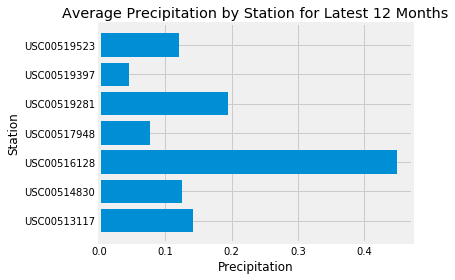

In [26]:
fig, ax = plt.subplots()
ypos = range(1, len(prcp)+1)
ax.barh(ypos, prcp)
ax.set_xlabel("Precipitation")
ax.set_ylabel("Station")
ax.set_yticks(ypos)
ax.set_yticklabels(station_id)
ax.set_title("Average Precipitation by Station for Latest 12 Months")
fig.tight_layout()
plt.show()

In [33]:
prcp_results = session.query(Measurement.date, func.avg(Measurement.prcp))\
            .filter(Measurement.date > query_date)\
            .filter(Measurement.date <= latest_date)\
            .group_by(Measurement.date)

In [34]:
date_list = [result[0] for result in prcp_results]
prcp_list = [result[1] for result in prcp_results]

In [35]:
prcp_overtime_df = pd.DataFrame(prcp_results, columns=['Date', 'Average Prcp'])
prcp_overtime_df.set_index('Date', inplace=True, )
prcp_overtime_df.head(10)

,Average Prcp
Date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
2016-08-29,0.243333
2016-08-30,0.011667
2016-08-31,0.636000
2016-09-01,0.006000


[]

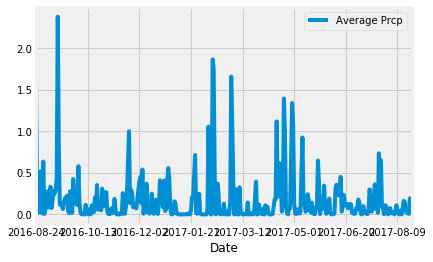

In [37]:
prcp_overtime_df.plot.line()


In [149]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prcp_overtime_df.describe()

,Average Prcp
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


![describe](Images/describe.png)

In [ ]:
# Design a query to show how many stations are available in this dataset?


In [42]:
count_stations = session.query(func.distinct(Measurement.station)).count()
count_stations

9

In [163]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_name = session.query(Station.name, Measurement.station, func.count(Measurement.tobs)).\
    filter(Measurement.station == Station.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs))

# station_name[6]

for name, station, count in station_name:
    station_dict = {}
    station_dict["name"] = name
    station_dict["station"] = station
    station_dict["count obs"] = count

print(station_dict)

{'name': 'WAIHEE 837.5, HI US', 'station': 'USC00519281', 'count obs': 2772}


In [98]:
station_observations = session.query(Measurement.station, func.count(Measurement.tobs))\
            .group_by(Measurement.station).order_by(func.count(Measurement.tobs))



In [99]:
station_id = [result[0] for result in station_observations]
total_obs = [float(result[1]) for result in station_observations]

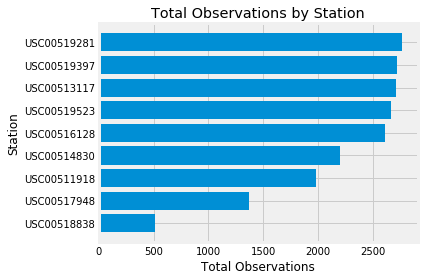

In [100]:
fig, ax = plt.subplots()
ypos = range(1, len(total_obs)+1)
ax.barh(ypos, total_obs)
ax.set_xlabel("Total Observations")
ax.set_ylabel("Station")
ax.set_yticks(ypos)
ax.set_yticklabels(station_id)
ax.set_title("Total Observations by Station")
fig.tight_layout()
plt.show()

In [101]:
station_observations_highest = session.query(Measurement.station, func.sum(Measurement.tobs))\
            .group_by(Measurement.station).order_by(func.sum(Measurement.tobs).desc()).first()
station_observations_highest[0]

'USC00519397'

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [123]:
highest_temp = session.query(func.max(Measurement.tobs))\
            .filter(Measurement.station == station_observations_highest[0])
highest_temp[0]

(87.0)

In [124]:
lowest_temp = session.query(func.min(Measurement.tobs))\
            .filter(Measurement.station == station_observations_highest[0])
lowest_temp[0]

(56.0)

In [125]:
avg_temp = session.query(func.avg(Measurement.tobs))\
            .filter(Measurement.station == station_observations_highest[0])
avg_temp[0]

(74.55323054331865)

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [165]:
freq_obs_highest = session.query(Measurement.date, Measurement.tobs)\
            .filter(Measurement.date > query_date)\
            .filter(Measurement.date <= latest_date)\
            .filter(Measurement.station == station_observations_highest[0]).all()

In [166]:
freq_obs = [float(result[1]) for result in freq_obs_highest]

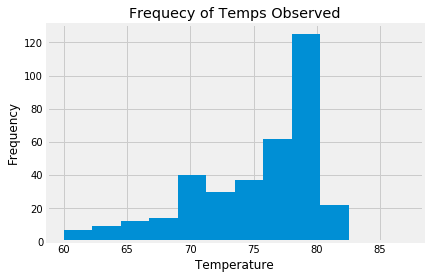

In [167]:
plt.hist(freq_obs, bins=12)
plt.title('Frequecy of Temps Observed')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.show()

![precipitation](Images/station-histogram.png)

In [128]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [168]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date = '2017-01-28'
end_date = '2017-03-05'

trip_data = (calc_temps(start_date,end_date))
print(trip_data)
min_temp_trip = trip_data[0][0]
print(min_temp_trip)
max_temp_trip = trip_data[0][2]
print(max_temp_trip)
avg_temp_trip = trip_data[0][1]
print(avg_temp_trip)

[(59.0, 70.00869565217391, 80.0)]
59.0
80.0
70.00869565217391


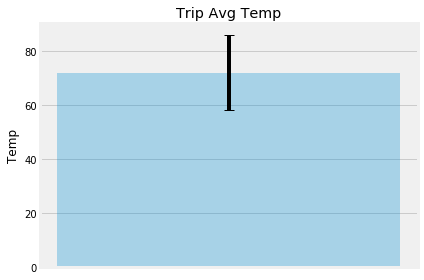

In [148]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig, ax = plt.subplots()
ax.bar(1,avg_temp_trip, yerr=max_temp_trip-min_temp_trip, align='center', alpha=0.3, ecolor='black', capsize=5)
ax.set_ylabel('Temp')

ax.set_title('Trip Avg Temp')
ax.yaxis.grid(True)
ax.xaxis.grid(False)
ax.xaxis.set_visible(False)

# Save the figure and show
plt.tight_layout()
plt.savefig('Output/Trip_Bar_Chart.png')
plt.show()


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
